# AI for Cyber Security Phishing domain detection

Phishing domain detection

## Phishing:

Phishing is a cybercrime where attackers try to trick you into giving up sensitive information (like passwords, credit card numbers, or personal data). They often do this by posing as legitimate entities (e.g., banks, companies) in emails, texts, or fake websites that mimic real ones. The goal is to steal your information or install malware on your device.

National Cyber Security Centre (UK):

https://www.ncsc.gov.uk/guidance/phishing

## Dataset

The dtataset used in this notebbok is:

https://www.kaggle.com/datasets/siddharthkumar25/malicious-and-benign-urls

This dataset contains malicious URLs and benign URLs that were created to help address the problem of malicious URLs on the internet. The data is gathered from various sources including PhisTank.

The tags in the dataset are:
*   benign: 0
*   malicious: 1



# Importing the Liberaries

In [1]:
import tensorflow as tf
import pandas as pd
from urllib.parse import urlparse
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset
df = pd.read_csv("urldata.csv")
df.head(10)

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
5,5,https://www.reddit.com,benign,0
6,6,https://www.yahoo.com,benign,0
7,7,https://www.google.co.in,benign,0
8,8,https://www.qq.com,benign,0
9,9,https://www.amazon.com,benign,0


In [2]:
df.shape

(450176, 4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  450176 non-null  int64 
 1   url         450176 non-null  object
 2   label       450176 non-null  object
 3   result      450176 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 13.7+ MB


## Feature Extraction

In [4]:
# Dropping the unnamed columns
df = df.drop('Unnamed: 0',axis=1)
df.head(10)

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0
5,https://www.reddit.com,benign,0
6,https://www.yahoo.com,benign,0
7,https://www.google.co.in,benign,0
8,https://www.qq.com,benign,0
9,https://www.amazon.com,benign,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [6]:
df.shape

(450176, 3)

In [7]:
# Analyzing the legit and fraud domain counts
df["label"].value_counts()

benign       345738
malicious    104438
Name: label, dtype: int64

### The extracted features are categorized into :

*   Length based Features
*   Count based Features
*   Binary Features



#### Length Features

The following features will be extracted from the URL for classification.

* Length Of Url
* Length of Hostname
* Length Of Path
* Length Of First Directory
* Length Of Top Level Domain

Length of URL (Phishers can use long URL to hide the doubtful part in the address bar)

In [8]:
# creating the URL length column
df['url_length'] = df['url'].apply(lambda i: len(str(i)))

Hostname Length (The hostname usually is a clear indication of the phishing)

In [9]:
# creating the hostname length column
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))

Path Length (exact location of the website's page)

In [10]:
# creating the path length column
df['path_length'] = df['url'].apply(lambda i: len(urlparse(i).path))

In [11]:
# printing first few rows of the dataframe
df.head(10)

,url,label,result,url_length,hostname_length,path_length
0,https://www.google.com,benign,0,22,14,0
1,https://www.youtube.com,benign,0,23,15,0
2,https://www.facebook.com,benign,0,24,16,0
3,https://www.baidu.com,benign,0,21,13,0
4,https://www.wikipedia.org,benign,0,25,17,0
5,https://www.reddit.com,benign,0,22,14,0
6,https://www.yahoo.com,benign,0,21,13,0
7,https://www.google.co.in,benign,0,24,16,0
8,https://www.qq.com,benign,0,18,10,0
9,https://www.amazon.com,benign,0,22,14,0


#### Count Features
The following features will be extracted from the URL for classification.

* Count Of Special Characters
* Count Of 'http'
* Count Of 'www'
* Count Of Digits
* Count Of Letters

In [12]:
# Count of how many times a special character appearsin url

special_chars = ["!", "@", "#", "$", "%", "^", "&", "*", "(", ")", "_", "+", "-", "=", "[", "]", "{", "}", "|", "\\", ":", ";", "'", "\"", "<", ">", ",", ".", "?", "/", "~", "`"]

for i in special_chars:
  df[f'count_{i}'] = df['url'].apply(lambda i : i.count(i))


In [13]:
# count of 'http' token
df['count_http'] = df['url'].apply(lambda i : i.count('http'))

# count of 'https' token
df['count-https'] = df['url'].apply(lambda i : i.count('https'))

# count of 'www' token
df['count-www'] = df['url'].apply(lambda i: i.count('www'))

Counting the number of digits in the url

In [14]:
# function to count the number of digits in the url
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

df['count-digits']= df['url'].apply(lambda i: digit_count(i))

counting the number of letters in the url

In [15]:
# function to count the number of letters in the url

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [16]:
# printing first few rows
df.head(10)

,url,label,result,url_length,hostname_length,path_length,count_!,count_@,count_#,count_$,...,count_.,count_?,count_/,count_~,count_`,count_http,count-https,count-www,count-digits,count-letters
0,https://www.google.com,benign,0,22,14,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,17
1,https://www.youtube.com,benign,0,23,15,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,18
2,https://www.facebook.com,benign,0,24,16,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,19
3,https://www.baidu.com,benign,0,21,13,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,16
4,https://www.wikipedia.org,benign,0,25,17,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,20
5,https://www.reddit.com,benign,0,22,14,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,17
6,https://www.yahoo.com,benign,0,21,13,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,16
7,https://www.google.co.in,benign,0,24,16,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,18
8,https://www.qq.com,benign,0,18,10,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,13
9,https://www.amazon.com,benign,0,22,14,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,17


#### Binary Features
The following features will be extracted from the URL for classification.

* Use of IP or not
* Use of Shortening URL or not

##### IP Address in the URL
Checks for the presence of IP address in the URL. URLs may have IP address instead of domain name. If an IP address is used as an alternative of the domain name in the URL, we can be sure that someone is trying to steal personal information with this URL.

In [17]:
import re

#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.'
        '([01]?\d\d?|2[0-4]\d|25[0-5])\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return -1
    else:
        return 1

df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

##### Using URL Shortening Services “TinyURL”
URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL.

In [18]:
# use of url shortening service
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1

df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [19]:
# printing first few rows
df.head(10)

,url,label,result,url_length,hostname_length,path_length,count_!,count_@,count_#,count_$,...,count_/,count_~,count_`,count_http,count-https,count-www,count-digits,count-letters,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,1,1,1,1,...,1,1,1,1,1,1,0,17,1,1
1,https://www.youtube.com,benign,0,23,15,0,1,1,1,1,...,1,1,1,1,1,1,0,18,1,1
2,https://www.facebook.com,benign,0,24,16,0,1,1,1,1,...,1,1,1,1,1,1,0,19,1,1
3,https://www.baidu.com,benign,0,21,13,0,1,1,1,1,...,1,1,1,1,1,1,0,16,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,1,1,1,1,...,1,1,1,1,1,1,0,20,1,1
5,https://www.reddit.com,benign,0,22,14,0,1,1,1,1,...,1,1,1,1,1,1,0,17,1,-1
6,https://www.yahoo.com,benign,0,21,13,0,1,1,1,1,...,1,1,1,1,1,1,0,16,1,1
7,https://www.google.co.in,benign,0,24,16,0,1,1,1,1,...,1,1,1,1,1,1,0,18,1,1
8,https://www.qq.com,benign,0,18,10,0,1,1,1,1,...,1,1,1,1,1,1,0,13,1,1
9,https://www.amazon.com,benign,0,22,14,0,1,1,1,1,...,1,1,1,1,1,1,0,17,1,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 45 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              450176 non-null  object
 1   label            450176 non-null  object
 2   result           450176 non-null  int64 
 3   url_length       450176 non-null  int64 
 4   hostname_length  450176 non-null  int64 
 5   path_length      450176 non-null  int64 
 6   count_!          450176 non-null  int64 
 7   count_@          450176 non-null  int64 
 8   count_#          450176 non-null  int64 
 9   count_$          450176 non-null  int64 
 10  count_%          450176 non-null  int64 
 11  count_^          450176 non-null  int64 
 12  count_&          450176 non-null  int64 
 13  count_*          450176 non-null  int64 
 14  count_(          450176 non-null  int64 
 15  count_)          450176 non-null  int64 
 16  count__          450176 non-null  int64 
 17  count_+   

## data Exploration

benign       345738
malicious    104438
Name: label, dtype: int64


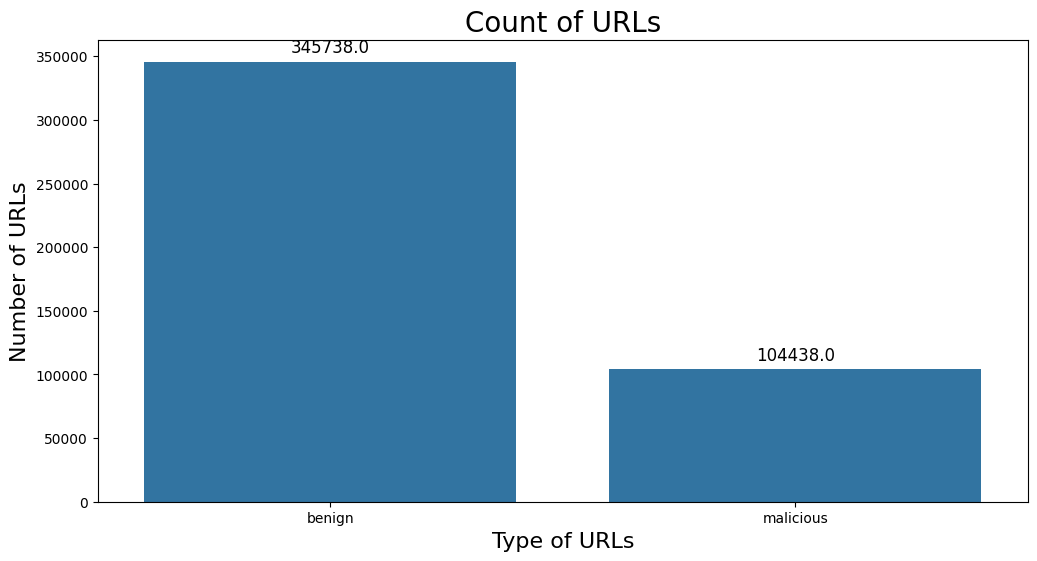

In [21]:
# Lets find how many malicious and non-malicious samples we have
i = df["label"].value_counts()
print(i)

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='label', data=df)
ax.set_title("Count of URLs", fontsize=20)
ax.set_xlabel("Type of URLs", fontsize=16)
ax.set_ylabel("Number of URLs", fontsize=16)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

#### **Oversampling Imbalanced Dataset**

During EDA we found that our dataset is Imbalanced,so we'll now use SMOTE method to oversample the dataset.


#### **SMOTE (Synthetic Minority Oversampling Technique)**

SMOTE is a technique used to address the problem of imbalanced datasets, where one class has significantly fewer examples than others. This imbalance can hinder machine learning models from learning the patterns of the minority class effectively.


SMOTE works by generating synthetic samples for the minority class, rather than simply duplicating existing ones. Here's how:

* **Find Neighbors:** For each sample in the minority class, SMOTE finds its k-nearest neighbors.
* **Create Synthetic Samples:** New samples are generated by randomly interpolating between a minority sample and its neighbors.

Further reading

Original Paper by Chawla et. al.: https://www.jair.org/index.php/jair/article/view/10302

In [28]:
y = df['result']
x = df.drop(['label', 'result', 'url'], axis=1)

In [29]:
x.head()

,url_length,hostname_length,path_length,count_!,count_@,count_#,count_$,count_%,count_^,count_&,...,count_/,count_~,count_`,count_http,count-https,count-www,count-digits,count-letters,use_of_ip,short_url
0,22,14,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,17,1,1
1,23,15,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,18,1,1
2,24,16,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,19,1,1
3,21,13,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,16,1,1
4,25,17,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,20,1,1


In [30]:
x.shape

(450176, 42)

In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [32]:
y.shape

(450176,)

In [33]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_sample, y_sample = smote.fit_resample(x, y)

In [37]:
x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

In [38]:
x.shape, y.shape

((450176, 42), (450176,))

## Models
We will use the following models for this binar classification problem

*  Random Forest
*  MLP (Multi Layer Perceptron)

### Data Splitting

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (553180, 42)
Shape of x_valid:  (138296, 42)
Shape of y_train:  (553180, 1)
Shape of y_valid:  (138296, 1)


### Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=7)

# start training the model
model.fit(x_train,y_train)

<ipython-input-40-1b02d89a7a36>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier(max_depth=7)

#### model performance evaluation

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.997
Accuracy on Testing dataset :  0.997


calculating other classification metrics

In [42]:
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     69204
   malicious       1.00      1.00      1.00     69092

    accuracy                           1.00    138296
   macro avg       1.00      1.00      1.00    138296
weighted avg       1.00      1.00      1.00    138296



### Multilayer Perceptron (Deep Learning)
A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.

In [43]:
# importing required liberaries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#### Model building

In [44]:
# model building
model = Sequential([
        Dense(32, activation = 'relu', input_shape = (42, )),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1376      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2049 (8.00 KB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Model complilation

In [45]:
# compiling model
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

#### Model Fitting

In [46]:
# start training the model
history = model.fit(x_train, y_train, epochs=10,batch_size=256, validation_data=(x_test,y_test))

Epoch 1/10
2161/2161 [==============================] - 7s 3ms/step - loss: 0.1003 - acc: 0.9693 - val_loss: 0.0241 - val_acc: 0.9955
Epoch 2/10
2161/2161 [==============================] - 5s 2ms/step - loss: 0.0221 - acc: 0.9957 - val_loss: 0.0180 - val_acc: 0.9965
Epoch 3/10
2161/2161 [==============================] - 5s 3ms/step - loss: 0.0198 - acc: 0.9961 - val_loss: 0.0179 - val_acc: 0.9967
Epoch 4/10
2161/2161 [==============================] - 7s 3ms/step - loss: 0.0188 - acc: 0.9963 - val_loss: 0.0197 - val_acc: 0.9963
Epoch 5/10
2161/2161 [==============================] - 6s 3ms/step - loss: 0.0180 - acc: 0.9964 - val_loss: 0.0182 - val_acc: 0.9968
Epoch 6/10
2161/2161 [==============================] - 6s 3ms/step - loss: 0.0171 - acc: 0.9966 - val_loss: 0.0160 - val_acc: 0.9970
Epoch 7/10
2161/2161 [==============================] - 5s 2ms/step - loss: 0.0166 - acc: 0.9967 - val_loss: 0.0155 - val_acc: 0.9971
Epoch 8/10
2161/2161 [==============================] - 6s 3ms

#### Model Performance Evaluation

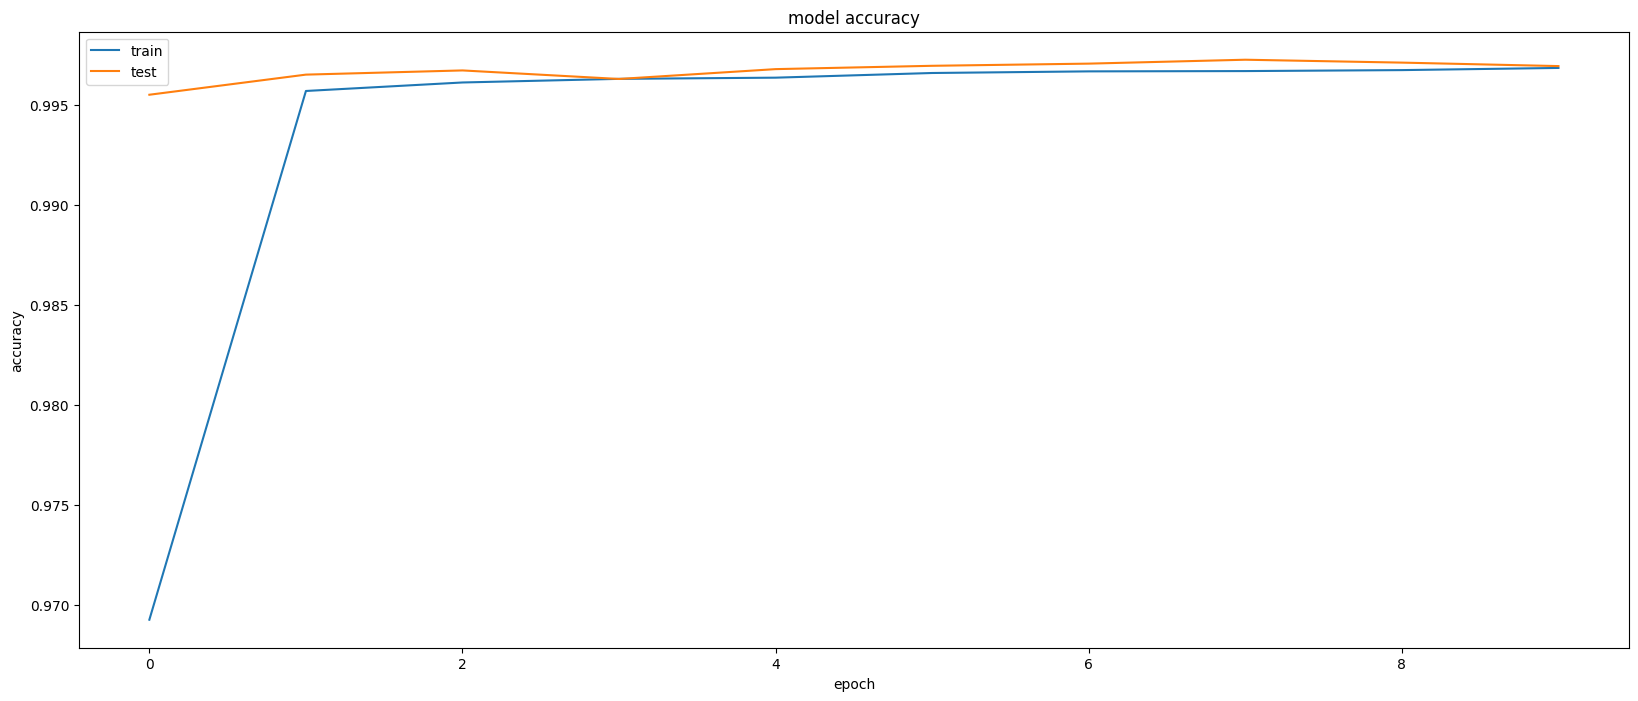

In [47]:
# accuracy plot
plt.figure(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

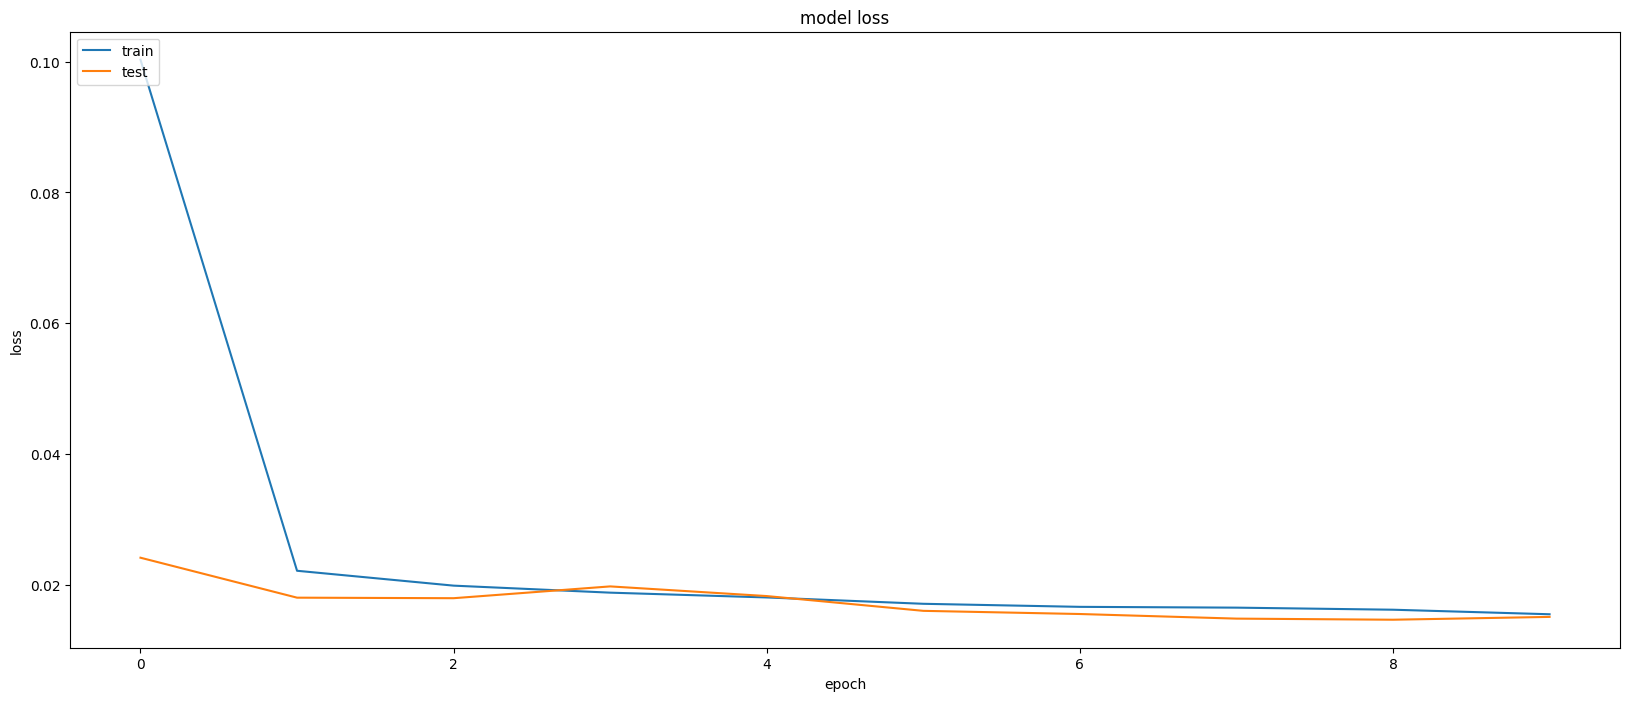

In [48]:
# loss plot
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()